In [1]:
import ENDFtk

In [2]:
import matplotlib.pyplot as plt

In [3]:
tape = ENDFtk.tree.Tape.from_file('n-026_Fe_056.endf')

In [4]:
for material in tape.materials:
    print('MAT {}'.format(material.MAT))
    for file in material.files:
        print('MF {}'.format(file.MF))
        for section in file.sections:
            print('MT {}, {} lines'.format(section.MT,section.NC))

MAT 2631
MF 1
MT 451, 1101 lines
MF 2
MT 151, 319 lines
MF 3
MT 1, 3888 lines
MT 2, 4872 lines
MT 4, 988 lines
MT 5, 23 lines
MT 16, 17 lines
MT 51, 925 lines
MT 52, 81 lines
MT 53, 29 lines
MT 54, 28 lines
MT 55, 28 lines
MT 56, 28 lines
MT 57, 28 lines
MT 58, 28 lines
MT 59, 28 lines
MT 60, 27 lines
MT 61, 27 lines
MT 62, 27 lines
MT 63, 27 lines
MT 64, 27 lines
MT 65, 27 lines
MT 66, 27 lines
MT 67, 27 lines
MT 68, 27 lines
MT 69, 27 lines
MT 70, 26 lines
MT 71, 26 lines
MT 72, 26 lines
MT 73, 26 lines
MT 74, 26 lines
MT 75, 26 lines
MT 76, 25 lines
MT 77, 25 lines
MT 78, 25 lines
MT 79, 25 lines
MT 80, 25 lines
MT 81, 25 lines
MT 82, 25 lines
MT 83, 25 lines
MT 84, 25 lines
MT 85, 25 lines
MT 86, 25 lines
MT 87, 24 lines
MT 88, 24 lines
MT 89, 24 lines
MT 91, 30 lines
MT 102, 56 lines
MT 103, 36 lines
MT 111, 15 lines
MT 600, 33 lines
MT 601, 33 lines
MT 602, 33 lines
MT 603, 33 lines
MT 604, 33 lines
MT 605, 32 lines
MT 606, 32 lines
MT 607, 31 lines
MT 608, 31 lines
MT 609, 30 li

In [5]:
section = tape.material(2631).file(3).section(2).parse()

In [6]:
print('{:^12} | {:^12}'.format('energy', 'xs'))
print('{:12} | {:12}'.format('-'*12, '-'*12))

   energy    |      xs     
------------ | ------------


In [7]:
for energy, value in zip(section.energies, section.cross_sections):
    print( '{:12.5e} | {:12.5e}'.format(energy*1e-6, value))

 1.00000e-11 |  0.00000e+00
 2.53000e-08 |  0.00000e+00
 1.00000e-05 |  0.00000e+00
 3.00000e-05 |  0.00000e+00
 6.00000e-05 |  0.00000e+00
 1.00000e-04 |  0.00000e+00
 3.00000e-04 |  0.00000e+00
 6.00000e-04 |  0.00000e+00
 1.00000e-03 |  0.00000e+00
 2.00000e-03 | -2.62230e-11
 3.00000e-03 | -5.24460e-11
 6.00000e-03 | -1.31110e-10
 1.00000e-02 | -2.36010e-10
 2.00000e-02 | -4.98230e-10
 2.50000e-02 | -6.29350e-10
 3.00000e-02 | -7.60460e-10
 5.00000e-02 | -1.28492e-09
 7.00000e-02 | -1.80938e-09
 1.00000e-01 | -2.59607e-09
 5.00000e-01 | -1.30852e-08
 5.01000e-01 | -8.22013e-04
 5.50000e-01 | -8.22014e-04
 5.51000e-01 | -9.30014e-04
 6.00000e-01 | -9.30016e-04
 6.01000e-01 | -1.39802e-03
 6.50000e-01 | -1.39802e-03
 6.51000e-01 | -2.67002e-03
 7.00000e-01 | -2.67002e-03
 7.01000e-01 | -1.24802e-03
 7.50000e-01 | -1.24802e-03
 7.51000e-01 | -3.08402e-03
 8.00000e-01 | -3.08402e-03
 8.01000e-01 | -3.15602e-03
 8.50000e-01 | -3.15602e-03
 8.50000e-01 |  1.49589e+00
 8.50160e-01 |  1.61

In [8]:
def get_data(filename):
 tape = ENDFtk.tree.Tape.from_file(filename)
 section = tape.materials.front().section(3, 1).parse()
 return section

In [9]:
u238 = get_data('n-092_U_238.endf')
pu239 = get_data('n-094_Pu_239.endf')
h1 = get_data('n-001_H_001.endf')
be9 = get_data('n-004_Be_009.endf')
o16 = get_data('n-008_O_016.endf')

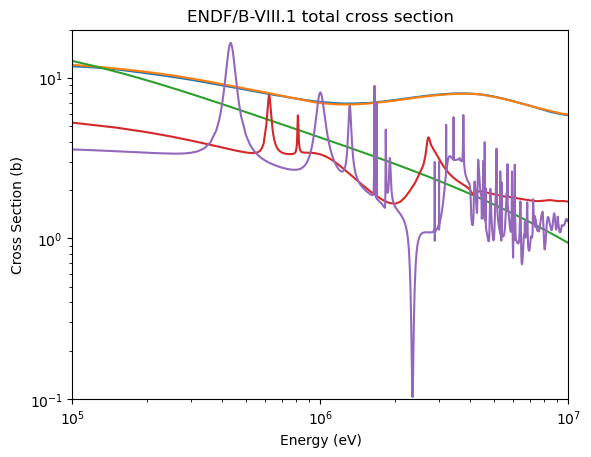

In [10]:
plt.figure()
plt.plot(u238.energies, u238.cross_sections, label='${}^{238}$U')
plt.plot(pu239.energies, pu239.cross_sections, label='${}^{239}$Pu')
plt.plot(h1.energies, h1.cross_sections, label='${}^{1}$H')
plt.plot(be9.energies, be9.cross_sections, label='${}^{9}$Be')
plt.plot(o16.energies, o16.cross_sections, label='${}^{16}$O')
plt.title('ENDF/B-VIII.1 total cross section' )
plt.xlabel('Energy (eV)'); plt.ylabel('Cross Section (b)')
plt.xlim((1e5, 1e7)); plt.ylim((0.1, 20))
plt.xscale('log'); plt.yscale('log')
plt.show()

In [11]:
import ENDFtk
import matplotlib.pyplot as plt

# Carrega o arquivo ENDF do Ferro-56
tape = ENDFtk.tree.Tape.from_file('n-026_Fe_056.endf')


In [12]:
section = tape.material(2631).file(3).section(103).parse()

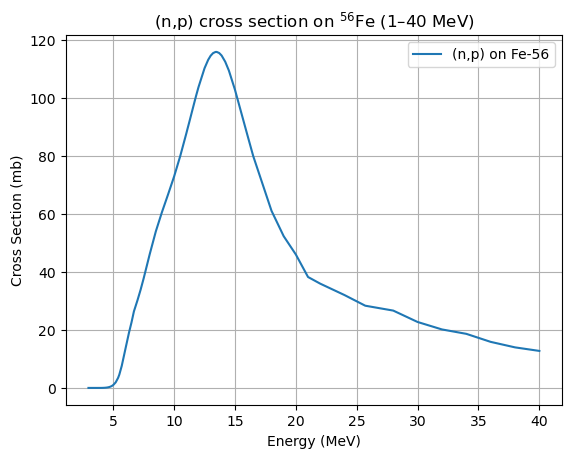

In [13]:
import numpy as np
energies = np.array(section.energies)
cross_sections = np.array(section.cross_sections)
mask = (energies >= 1e6) & (energies <= 4e7)

plt.figure()
plt.plot(energies[mask]*1e-6, cross_sections[mask]*1e3, label='(n,p) on Fe-56')
plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (mb)')
plt.title('(n,p) cross section on $^{56}$Fe (1–40 MeV)')
#plt.xscale('lin')
#plt.yscale('lin')
plt.grid()
plt.legend()
plt.show()


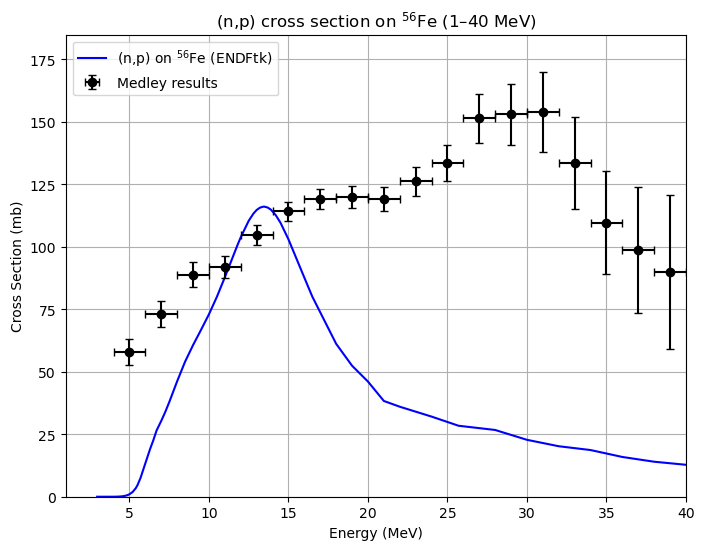

In [14]:
import numpy as np
import ENDFtk
import matplotlib.pyplot as plt

# Carrega o arquivo ENDF do Ferro-56 e extrai a seção (n,p)
tape = ENDFtk.tree.Tape.from_file('n-026_Fe_056.endf')
section = tape.material(2631).file(3).section(103).parse()
energies = np.array(section.energies)       # em eV
cross_sections = np.array(section.cross_sections)  # em barns

# Filtro entre 1 e 40 MeV (1e6 eV a 4e7 eV)
mask = (energies >= 1e6) & (energies <= 4e7)

# Dados fornecidos (Medley results)
x = np.array([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])  # MeV
y = np.array([57.8378, 73.1924, 88.867, 91.9524, 104.599, 114.158, 119.173, 119.948, 118.879,
              126.084, 133.452, 151.398, 152.875, 153.979, 133.353, 109.64, 98.7422, 89.918])  # mb
ex = np.ones_like(x)  # erro ±1 MeV
ey = np.array([5.11779, 5.19727, 4.91327, 4.28697, 3.96915, 3.8542, 4.00601, 4.30842,
               4.80512, 5.89492, 7.3063, 9.84384, 12.2678, 16.0862, 18.4655, 20.6235, 25.2045, 30.9235])  # mb

plt.figure(figsize=(8,6))

# Plot do ENDFtk (converte eV->MeV, barns->mb)
plt.plot(energies[mask]*1e-6, cross_sections[mask]*1e3, label='(n,p) on $^{56}$Fe (ENDFtk)', color='blue')

# Plot dos dados Medley com barras de erro
plt.errorbar(x, y, xerr=ex, yerr=ey, fmt='o', color='black', label='Medley results', capsize=3)

plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (mb)')
plt.title('(n,p) cross section on $^{56}$Fe (1–40 MeV)')
plt.xlim(1, 40)
plt.ylim(0, max(y)*1.2)
plt.grid(True)
plt.legend()
plt.show()


Erro ao processar MT=28: map::at
Erro ao processar MT=41: map::at
Erro ao processar MT=42: map::at
Erro ao processar MT=44: map::at
Erro ao processar MT=45: map::at
[error] The requested section (MF3 MT28) is not present in the ENDF file tree
[error] The requested section (MF3 MT41) is not present in the ENDF file tree
[error] The requested section (MF3 MT42) is not present in the ENDF file tree
[error] The requested section (MF3 MT44) is not present in the ENDF file tree
[error] The requested section (MF3 MT45) is not present in the ENDF file tree
Erro ao processar MT=115: map::at
Erro ao processar MT=116: map::at
[error] The requested section (MF3 MT115) is not present in the ENDF file tree
[error] The requested section (MF3 MT116) is not present in the ENDF file tree


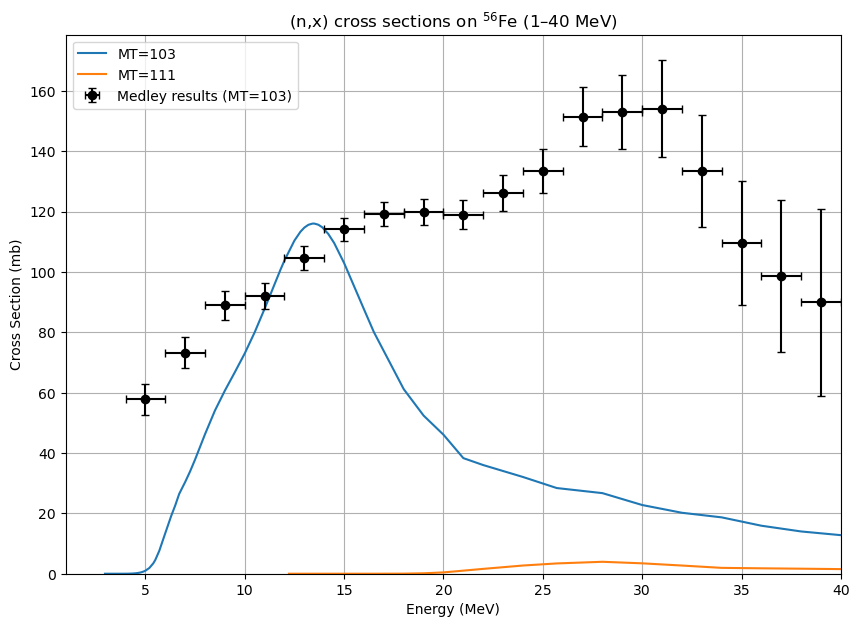

In [16]:
import numpy as np
import ENDFtk
import matplotlib.pyplot as plt

# Carrega o arquivo ENDF do Ferro-56
tape = ENDFtk.tree.Tape.from_file('n-026_Fe_056.endf')
material = tape.material(2631)
file_3 = material.file(3)

# MTs que você quer plotar
mts = [28, 41, 42, 44, 45, 103, 111, 115, 116]

plt.figure(figsize=(10,7))

for mt in mts:
    try:
        section = file_3.section(mt).parse()
        energies = np.array(section.energies)       # em eV
        cross_sections = np.array(section.cross_sections)  # em barns

        # Filtro entre 1 e 40 MeV (1e6 eV a 4e7 eV)
        mask = (energies >= 1e6) & (energies <= 4e7)

        # Plot do ENDFtk (converte eV->MeV, barns->mb)
        plt.plot(energies[mask]*1e-6, cross_sections[mask]*1e3, label=f'MT={mt}')
    except Exception as e:
        print(f"Erro ao processar MT={mt}: {e}")

# Plot dos dados Medley para MT=103 (exemplo)
x = np.array([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])  # MeV
y = np.array([57.8378, 73.1924, 88.867, 91.9524, 104.599, 114.158, 119.173, 119.948, 118.879,
              126.084, 133.452, 151.398, 152.875, 153.979, 133.353, 109.64, 98.7422, 89.918])  # mb
ex = np.ones_like(x)  # erro ±1 MeV
ey = np.array([5.11779, 5.19727, 4.91327, 4.28697, 3.96915, 3.8542, 4.00601, 4.30842,
               4.80512, 5.89492, 7.3063, 9.84384, 12.2678, 16.0862, 18.4655, 20.6235, 25.2045, 30.9235])  # mb

plt.errorbar(x, y, xerr=ex, yerr=ey, fmt='o', color='black', label='Medley results (MT=103)', capsize=3)

plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (mb)')
plt.title('(n,x) cross sections on $^{56}$Fe (1–40 MeV)')
plt.xlim(1, 40)
plt.ylim(0)
plt.grid(True)
plt.legend()
plt.show()


In [19]:
import ENDFtk

tape = ENDFtk.tree.Tape.from_file('n-026_Fe_056.endf')
material = tape.material(2631)
file_3 = material.file(3)

print("Seções MT disponíveis em file 3:")
for section in file_3.sections:
    print(f"MT = {section.MT}")

Seções MT disponíveis em file 3:
MT = 1
MT = 2
MT = 4
MT = 5
MT = 16
MT = 51
MT = 52
MT = 53
MT = 54
MT = 55
MT = 56
MT = 57
MT = 58
MT = 59
MT = 60
MT = 61
MT = 62
MT = 63
MT = 64
MT = 65
MT = 66
MT = 67
MT = 68
MT = 69
MT = 70
MT = 71
MT = 72
MT = 73
MT = 74
MT = 75
MT = 76
MT = 77
MT = 78
MT = 79
MT = 80
MT = 81
MT = 82
MT = 83
MT = 84
MT = 85
MT = 86
MT = 87
MT = 88
MT = 89
MT = 91
MT = 102
MT = 103
MT = 111
MT = 600
MT = 601
MT = 602
MT = 603
MT = 604
MT = 605
MT = 606
MT = 607
MT = 608
MT = 609
MT = 649
MT = 800
MT = 801
MT = 802
MT = 803
MT = 804
MT = 805
MT = 806
MT = 807
MT = 808
MT = 809
MT = 810
MT = 811
MT = 812
MT = 813
MT = 814
MT = 815
MT = 816
MT = 817
MT = 818
